In [139]:
def rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma):
    # get the difference between the values predicted by the model and the actual bp-rp values
    for j in range(2):
        diff = []
        model = np.polyfit(x_s1, y_s1, 20)
        predict = np.poly1d(model)
        predicted = np.arange(len(x_s1), dtype=float)
        for i in range(len(np.array(x_s1))):
            predicted[i] = predict(np.array(x_s1)[i])

        # get the difference between the values predicted by the model and the actual bp-rp values
        diff = y_s1 - predicted

        #get the standard deviation of the differences
        sigma = []
        precision = 10*(10**(-3))
        for n in range(len(x_s1)):
            if x_s1[n] <13:
                precision = 2*(10**(-3))
            elif x_s1[n] < 18:
                precision = 10*(10**(-3))
            else:
                precision = 200*(10**(-3))
            sigma.append(np.sqrt(2*precision**2))
        sigma = np.array(sigma)
        x_filtered = []
        y_filtered = []
        for k in range(len(diff)):
            if diff[k] >= 5*sigma[k]:
                outliers_5sigma.append(x_s1[k])
                y_5sigma.append(y_s1[k])
    
            #elif diff[k] >= 2*sigma[k]:
             #   outliers_2sigma.append(x_s1[k])
              #  y_2sigma.append(y_s1[k])
            else:
                x_filtered.append(x_s1[k])
                y_filtered.append(y_s1[k])
        x_s1 = x_filtered
        y_s1 = y_filtered
    outliers_5sigma = np.array(outliers_5sigma)
    outliers_2sigma = np.array(outliers_2sigma)
        
    return x_s1, y_s1,outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict



In [140]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
with fits.open('NearbyClustersGaia_GALEX_SDSS_Skymapper_2MASS_WISE_ASASSN.fits') as hdu:
    asn_table = Table(hdu[1].data)
df = asn_table.to_pandas()
df_IC = df[(df['Cluster']=='IC2391  ')]

In [142]:
df_IC.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)

<ipython-input-142-31fae89d8e8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IC.dropna(subset = ['gmag','rpmag','bpmag'], inplace = True)


In [143]:
x = np.array(df_IC['gmag'])
y = np.array(df_IC['bpmag']- df_IC['rpmag'])
x_s1 = []
y_s1=[]
for i in range(len(x)):
    #if(x[i]>=13):
        x_s1.append(x[i])
        y_s1.append(y[i])

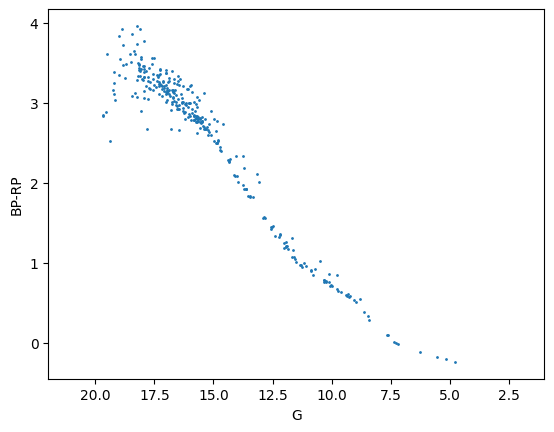

In [144]:
plt.scatter(x, y, s = 1)
plt.xlim(22,1)
plt.xlabel('G')
plt.ylabel('BP-RP')
plt.show()

In [145]:
# Extract the outliers
outliers_5sigma = [] #outliers outside of the 2 sigma value
y_5sigma = [] # corresponding bp-rp values
outliers_2sigma = [] #outliers outside of the 1.5 sigma value
y_2sigma = [] # corresponding bp-rp values

In [146]:
x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict1 = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)

<ipython-input-146-ad0eb92d44b5>:1: RankWarning: Polyfit may be poorly conditioned
  x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict1 = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)
<ipython-input-146-ad0eb92d44b5>:1: RankWarning: Polyfit may be poorly conditioned
  x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma, predict1 = rejection(x_s1, y_s1, outliers_5sigma, y_5sigma, outliers_2sigma, y_2sigma)


In [147]:
x_lin_reg1 = range(3, 21)
y_lin_reg1 = predict1(x_lin_reg1)

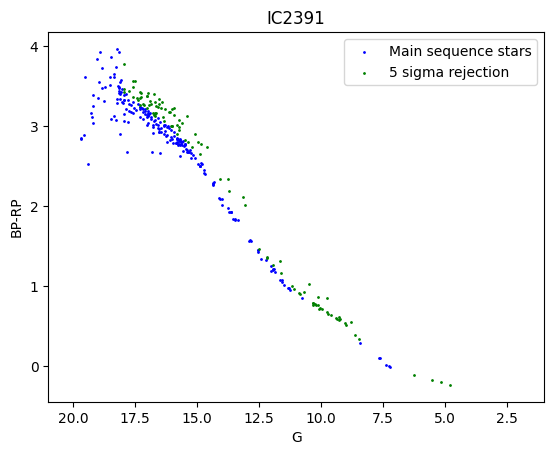

In [150]:
# plot the good values alongside the rejected values and the fitted line
plt.xlim(21,1)
plt.scatter(x_s1, y_s1, c = 'b', label = 'Main sequence stars', s = 1)
plt.scatter(outliers_5sigma, y_5sigma, c = 'g', label = '5 sigma rejection', s=1)
#plt.scatter(outliers_2sigma, y_2sigma, c = 'm',label = '2 sigma rejection', s=1)
plt.xlabel('G')
plt.ylabel('BP-RP')
#plt.plot(x_lin_reg1, y_lin_reg1, c = 'r', label='Fitted line1')
plt.title('IC2391')
plt.legend()
plt.show()

In [134]:
dframe = df[(df['gmag']==x_s1[0])]

In [136]:
for i in range(1, len(x_s1)):
    dframe = pd.concat([dframe,df[(df['gmag']==x_s1[i])]],ignore_index = True)

In [137]:
dframe

,dr2_source_id,dr3_source_id,Cluster,SimbadName_cluster,e_plx_cluster,plx_cluster,skymapper_id,sdss_id,twomass_id,allwise_id,...,cc_flags,ext_flg,ph_qual_2,moon_lev,asassn_name,Mean Vmag_ASASSN,amplitude_ASASSN,period_ASASSN,Type_ASASSN,class_probability_ASASSN
0,5303796328635472896,5303796328635472896,IC2391,IC2391,0.007,6.597,455800665,-9223372036854775808,09103388-5706318,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
1,5304032105158679040,5304032105158679040,IC2391,IC2391,0.007,6.597,456128719,-9223372036854775808,09081472-5638471,J090814.69-563847.0,...,ddHH,0,AAUU,0000,,NaN,NaN,NaN,,NaN
2,5304254515738128000,5304254515738128000,IC2391,IC2391,0.007,6.597,456968652,-9223372036854775808,08513515-5729004,J085135.11-572900.1,...,0000,0,AABU,0000,,NaN,NaN,NaN,,NaN
3,5304511938898669568,5304511938898669568,IC2391,IC2391,0.007,6.597,457038627,-9223372036854775808,08485107-5705449,J084851.05-570544.7,...,dd00,0,AAAU,0000,,NaN,NaN,NaN,,NaN
4,5305091377221520128,5305091377221520128,IC2391,IC2391,0.007,6.597,456274575,-9223372036854775808,08562352-5525494,J085623.49-552549.0,...,0000,0,AAUU,0000,,NaN,NaN,NaN,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,5329278232155047552,5329278232155047552,IC2391,IC2391,0.007,6.597,-9223372036854775808,-9223372036854775808,,J083728.91-475323.9,...,0h00,1,AAAU,0011,,NaN,NaN,NaN,,NaN
208,5329278232161103744,5329278232161103744,IC2391,IC2391,0.007,6.597,-9223372036854775808,-9223372036854775808,,J083728.91-475323.9,...,,-2147483648,,,,NaN,NaN,NaN,,NaN
209,5329387942806785280,5329387942806785280,IC2391,IC2391,0.007,6.597,441494096,-9223372036854775808,08403783-4724369,J084037.79-472436.7,...,0000,1,AABB,0011,,NaN,NaN,NaN,,NaN
210,5515438259539829504,5515438259539829504,IC2391,IC2391,0.007,6.597,442000788,-9223372036854775808,08285672-4816195,,...,,-2147483648,,,,NaN,NaN,NaN,,NaN


212